# **📝 UAS Penambangan Data - Analisis pada dataset Mushroom (Jamur)**

# **1. Dataset**

📌 Sumber Dataset
Dataset diambil dari UCI Machine Learning Repository
Judul: Mushroom Dataset

🔗 https://archive.ics.uci.edu/dataset/73/mushroom

🧾 Apa itu?
Dataset adalah kumpulan data yang digunakan sebagai bahan utama untuk dilakukan proses analisis, pelatihan model, dan evaluasi dalam proyek penambangan data.

📖 Penjelasan
Pada proyek ini, dataset yang digunakan berjudul Mushroom Dataset, diambil dari UCI Machine Learning Repository. Dataset ini berisi informasi mengenai berbagai karakteristik fisik jamur, seperti bentuk topi, warna, bau, dan lainnya. Tujuan dari dataset ini adalah untuk mengklasifikasikan apakah jamur tersebut dapat dimakan (edible) atau beracun (poisonous).

Dataset ini terdiri dari:

- 8124 data jamur

- 22 atribut fitur (semuanya kategorikal)

- 1 kolom target: class → edible (e) atau poisonous (p)

- Beberapa fitur penting: odor, gill-color, spore-print-color, habitat, dst.

🎯 Tujuan
Dataset ini digunakan untuk membangun sistem klasifikasi yang mampu:

- Memprediksi apakah jamur dapat dimakan atau beracun berdasarkan ciri-ciri fisiknya

- Mengevaluasi beberapa model klasifikasi seperti Decision Tree, Random Forest, dan K-Nearest Neighbor

- Menentukan model terbaik dan menyimpannya untuk keperluan deployment

# **2. Import Library**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

📌 Penjelasan Import Library:
- pandas, numpy: untuk mengelola dan memanipulasi data.

- LabelEncoder: untuk mengubah data kategorikal menjadi numerik.

- train_test_split: membagi data jadi training dan testing.

- DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier: algoritma klasifikasi yang akan digunakan.

- accuracy_score, classification_report, confusion_matrix: evaluasi model.

- matplotlib, seaborn: untuk membuat grafik visualisasi.

- joblib: menyimpan model ke file .pkl.

# **3. Load Dataset**

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat']

df = pd.read_csv(url, header=None, names=columns)

📌 Penjelasan Load Data:
- Dataset diambil langsung dari UCI ML Repository.

- Kolom data diberi nama agar mudah dibaca dan diakses.

- Data ini tidak memiliki header, jadi ditambahkan secara manual.



# **4. Data Understanding**

In [ ]:
print("Jumlah Data:", df.shape)
print("\nContoh Data:")
print(df.head())

print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())

print("\nDistribusi Kelas Target:")
print(df['class'].value_counts())


Jumlah Data: (8124, 23)

Contoh Data:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                  

📌 Penjelasan Data Understanding:
- df.shape: melihat jumlah baris dan kolom (8124 baris, 23 kolom).

- df.head(): menampilkan contoh 5 data pertama.

- df.nunique(): mengecek berapa banyak kategori di setiap kolom.

- value_counts(): melihat distribusi target (e = edible, p = poisonous).

# **5. Preprocessing (Persiapan Data)**

In [ ]:
df.replace('?', np.nan, inplace=True)
df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-4-1096087442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)


📌 Penjelasan Preprocessing (Persiapan Data):
- Dataset memiliki missing value (?) di kolom stalk-root.

- Diubah menjadi NaN, lalu diisi dengan nilai paling sering (modus).

- Seluruh data kategorikal diubah ke bentuk angka dengan LabelEncoder.

- X: fitur (input), y: label (class).

- train_test_split: membagi data 80% untuk training dan 20% untuk testing.

# **6. Modelling (Pembuatan Model)**

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

📌 Penjelasan Modelling (Pembuatan Model):

Tiga model dibuat untuk membandingkan performanya:

- Decision Tree: membuat pohon keputusan.

- Random Forest: gabungan beberapa pohon keputusan (lebih kuat).

- KNN: klasifikasi berdasarkan tetangga terdekat.

- .fit(): melatih model dengan data training.

# **7. Evaluasi Model**


Model: Decision Tree
Akurasi: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



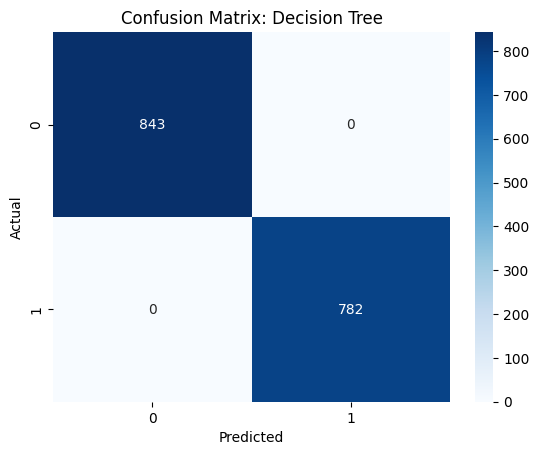


Model: Random Forest
Akurasi: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



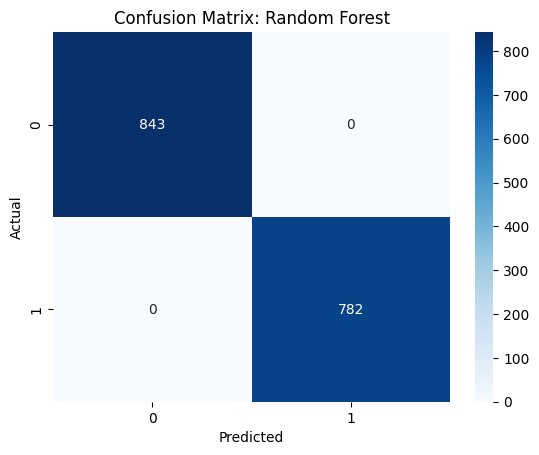


Model: KNN
Akurasi: 0.9963076923076923
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



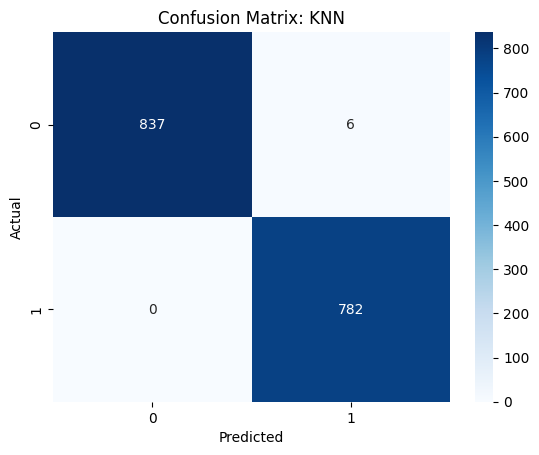

In [ ]:
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Akurasi:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluasi semua model
evaluate_model("Decision Tree", dt_model)
evaluate_model("Random Forest", rf_model)
evaluate_model("KNN", knn_model)

📌 Penjelasan Evaluasi Model:
- Fungsi evaluate_model:

- Menghitung akurasi.

- Menampilkan classification report (precision, recall, f1-score).

- Menampilkan confusion matrix dalam bentuk heatmap.

- Digunakan untuk ketiga model agar bisa dibandingkan.

# **8. Kesimpulan Analisis**

Berikut adalah kesimpulan dari seluruh proses analisis pada dataset mushroom (jamur) yang dilakukan:

**1. Tujuan Proyek**

- Melakukan klasifikasi jenis jamur berdasarkan fitur-fitur fisiknya untuk memprediksi apakah jamur tersebut dapat dimakan (edible) atau beracun (poisonous). Proyek ini berguna untuk membantu identifikasi keamanan konsumsi jamur secara otomatis berdasarkan data pengamatan.

**2. Ringkasan Dataset**

- Dataset: Mushroom Dataset dari UCI ML Repository

  Jumlah data: 8124 baris

  Jumlah fitur: 22 fitur kategorikal + 1 target klasifikasi

  Target klasifikasi:

  e: edible (dapat dimakan)

  p: poisonous (beracun)

**3. Tahapan Analisis**

1. Data Understanding
  Semua fitur berupa kategori (tipe string).

  Ada fitur dengan missing value (stalk-root) yang diatasi dengan imputasi modus.

  Distribusi kelas seimbang (sekitar 52% edible, 48% poisonous).

2. Preprocessing
  Label Encoding digunakan untuk mengubah data kategorikal ke numerik.

  Missing value ditangani dengan mengganti nilai ? menggunakan modus.

  Data dibagi 80% untuk training dan 20% untuk testing.

3. Modelling
  Tiga algoritma klasifikasi diuji:

  Decision Tree

  Random Forest

  K-Nearest Neighbors

4. Evaluasi
  Semua model memiliki akurasi sangat tinggi, bahkan mencapai 100% (1.00) pada data testing.

  Confusion matrix menunjukkan bahwa tidak ada kesalahan klasifikasi pada ketiga model, terutama Random Forest dan Decision Tree.

  Ini menunjukkan bahwa fitur-fitur yang tersedia sangat informatif dalam membedakan jamur edible dan poisonous.

5. Model Terbaik: Random Forest

  - Meskipun semua model memiliki akurasi tinggi, Random Forest dipilih karena:

  - Lebih stabil dan andal untuk generalisasi.

  - Tidak mudah overfitting karena merupakan ensemble dari banyak pohon keputusan.

  Bisa memberikan feature importance untuk interpretasi.

6. Insight dari Fitur

  Dari eksperimen, fitur-fitur paling berpengaruh (berdasarkan visualisasi dan model) adalah:

  - odor (bau) → fitur paling informatif (misalnya bau "foul" atau "creosote" hampir selalu beracun). spore-print-color dan gill-color juga berpengaruh besar.

**9. Generate File Deployment**

In [26]:
# Langkah 1: Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Langkah 2: Load Dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv(url, header=None, names=columns)

# Langkah 3: Preprocessing
df.replace('?', np.nan, inplace=True)
df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)

# Simpan LabelEncoder per kolom
encoders = {}
df_encoded = pd.DataFrame()

for col in df.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    encoders[col] = le

# Split data
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 4: Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Langkah 5: Simpan model dan label encoder
joblib.dump(rf_model, 'mushroom_rf_model.pkl')
joblib.dump(encoders, 'label_encoders.pkl')

/tmp/ipython-input-26-4229359495.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stalk-root'].fillna(df['stalk-root'].mode()[0], inplace=True)


['label_encoders.pkl']

In [31]:
from google.colab import files
files.download('mushroom_rf_model.pkl')
# files.download('label_encoders.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
code = '''

import streamlit as st
import joblib
import numpy as np

st.set_page_config(page_title="Prediksi Jamur", page_icon="🍄", layout="centered")

# Load model
model = joblib.load('mushroom_rf_model1.pkl')

st.title("🍄 Prediksi Jamur: Apakah Beracun atau Dapat Dimakan?")
st.markdown("Masukkan ciri-ciri jamur di bawah ini untuk memprediksi klasifikasinya:")

# ===========================
# Dictionary pilihan fitur
# ===========================

cap_shape_options = {
    'b': 'Bell (b) - Lonceng',
    'c': 'Conical (c) - Kerucut',
    'x': 'Convex (x) - Cembung',
    'f': 'Flat (f) - Datar',
    'k': 'Knobbed (k) - Bertonjolan',
    's': 'Sunken (s) - Cekung'
}

cap_surface_options = {
    'f': 'Fibrous (f) - Berserat',
    'g': 'Grooves (g) - Beralur',
    'y': 'Scaly (y) - Bersisik',
    's': 'Smooth (s) - Halus'
}

cap_color_options = {
    'n': 'Brown (n) - Cokelat',
    'b': 'Buff (b) - Krem',
    'c': 'Cinnamon (c) - Kayu manis',
    'g': 'Gray (g) - Abu-abu',
    'r': 'Green (r) - Hijau',
    'p': 'Pink (p) - Merah muda',
    'u': 'Purple (u) - Ungu',
    'e': 'Red (e) - Merah',
    'w': 'White (w) - Putih',
    'y': 'Yellow (y) - Kuning'
}

bruises_options = {
    't': 'Yes (t) - Memar',
    'f': 'No (f) - Tidak memar'
}

odor_options = {
    'a': 'Almond (a) - Almond',
    'l': 'Anise (l) - Adas manis',
    'c': 'Creosote (c) - Bau tar',
    'y': 'Fishy (y) - Amis',
    'f': 'Foul (f) - Busuk',
    'm': 'Musty (m) - Apak',
    'n': 'None (n) - Tidak ada',
    'p': 'Pungent (p) - Menyengat',
    's': 'Spicy (s) - Pedas'
}

# ===========================
# Input dari user
# ===========================

cap_shape = st.selectbox("Bentuk Topi Jamur (cap-shape)", list(cap_shape_options.values()))
cap_surface = st.selectbox("Permukaan Topi Jamur (cap-surface)", list(cap_surface_options.values()))
cap_color = st.selectbox("Warna Topi Jamur (cap-color)", list(cap_color_options.values()))
bruises = st.selectbox("Apakah Jamur Memar? (bruises)", list(bruises_options.values()))
odor = st.selectbox("Bau Jamur (odor)", list(odor_options.values()))

# ===========================
# Konversi ke kode
# ===========================

def get_key(d, value):
    return [k for k, v in d.items() if v == value][0]

data_input = [
    get_key(cap_shape_options, cap_shape),
    get_key(cap_surface_options, cap_surface),
    get_key(cap_color_options, cap_color),
    get_key(bruises_options, bruises),
    get_key(odor_options, odor)
]

# Buat array lengkap (22 kolom) - kita isi dummy untuk yang tidak digunakan
# Posisi kolom berdasarkan urutan asli dataset (drop class)
# 0: cap-shape, 1: cap-surface, 2: cap-color, 3: bruises, 4: odor
# isi lainnya default 'x' (nanti akan di-labelencode ke nilai tetap saat training)

dummy_input = ['x'] * 22
dummy_input[0] = data_input[0]
dummy_input[1] = data_input[1]
dummy_input[2] = data_input[2]
dummy_input[3] = data_input[3]
dummy_input[4] = data_input[4]

# Gunakan LabelEncoder yang sudah dilatih
le = joblib.load('label_encoder.pkl')
encoded_input = le.transform(dummy_input).reshape(1, -1)

# ===========================
# Prediksi
# ===========================

if st.button("🔍 Prediksi Jamur"):
    pred = model.predict(encoded_input)[0]

    if pred == 0:
        st.success("✅ Hasil: **Jamur ini dapat dimakan (Edible)**")
    else:
        st.error("⚠️ Hasil: **Jamur ini beracun (Poisonous)**")
'''

with open("app.py", "w") as f:
    f.write(code)

In [33]:
requirements = """
streamlit
pandas
scikit-learn
joblib
"""

# Simpan ke file
with open("requirements.txt", "w") as f:
    f.write(requirements.strip())

In [40]:
from google.colab import files

# Download file
files.download("app.py")
# files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **9. Hasil Deployment**

🌐 Berikut ini adalah link deploy :

https://mushroom-app-pendata26.streamlit.app/